In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [3]:
all_res = glob('out/**/*.pkl')

In [4]:
all_res

[]

In [5]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    num_points = loaded['num_train_points']

    metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['gpr_baseline']['mean_absolute_error'],
        'max_error': loaded['gpr_baseline']['max_error'],
        'mse': loaded['gpr_baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [6]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [7]:
compiled_res

""


In [8]:
compiled_grouped_res = compiled_res.groupby('num_train_points').agg(['mean', 'std'])

KeyError: 'num_train_points'

In [ ]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

In [ ]:
compiled_grouped_res

mae           max_error            \
                                     mean       std      mean       std   
representation num_train_points                                           
InChI          10                     NaN       NaN       NaN       NaN   
               50                2.505747  0.093386  7.810000  0.900722   
               100               2.306987  0.224563  8.053333  0.808290   
               200               2.183013  0.171662  7.990000  1.049905   
               500               2.022260  0.024636  7.210000  1.088944   
SELFIES        10                1.995320       NaN  6.790000       NaN   
               50                2.286120  0.057465  8.242500  0.363536   
               100               2.341370  0.206637  8.360000  0.070238   
               200               2.244933  0.025310  8.176667  0.505404   
               500               2.123787  0.099971  7.830000  0.665733   
SMILES         10                2.314952  0.373181  7.062000  1.057270   
               50                2.483760  0.273902  7.954000  1.352915   
               100               2.326768  0.272192  8.008000  0.763950   
               200               2.119240  0.072353  8.021667  0.431343   
               500               2.007792  0.115928  7.116000  0.861063   

                                      mse            
                                     mean       std  
representation num_train_points                      
InChI          10                     NaN       NaN  
               50                9.234676  0.736928  
               100               8.205523  1.616698  
               200               7.486440  1.479420  
               500               6.392757  0.396813  
SELFIES        10                6.026665       NaN  
               50                8.064481  0.198673  
               100               8.582421  1.670089  
               200               7.873904  0.203463  
               500               7.290227  0.442209  
SMILES         10                7.884734  2.514549  
               50                9.253411  1.853798  
               100               8.275603  2.047614  
               200               7.115339  0.394155  
               500               6.555072  0.882760

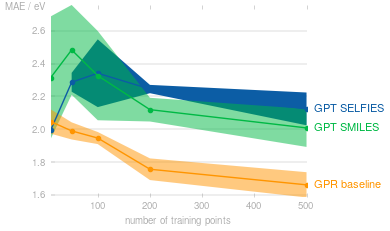

In [9]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)
    ax.plot(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'], 
        label='GPT SELFIES', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] - compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] + compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'], 
        label='GPT SMILES',
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] - compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] + compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
        alpha=.5
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='GPR baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    #ax.set_xscale('log')

fig.savefig('opv_regression_res.pdf', bbox_inches='tight')
